## Final Project Submission

Please fill out:
* Student name: Caroline Wanjiru Mbugua
* Student pace: part time 
* Scheduled project review date/time: 5th Nov 2023
* Instructor name: Veronica Isiaho
* Blog post URL:https://cwanjirumbugua.wordpress.com/2023/11/03/analyzing-total-gross-and-average-ratings-to-understand-film-profitability/

Project Overview
For this project, you will use exploratory data analysis to generate insights for a business stakeholder.

Business Problem
Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. 
You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

In [197]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [198]:
# df = pd.read_csv('bom.movie_gross.csv', encoding='utf-8')
Gross = pd.read_csv('bom.movie_gross.csv')
Gross.sample(100)

,title,studio,domestic_gross,foreign_gross,year
2996,Tom of Finland,KL,378000.0,NaN,2017
1551,The Hundred-Foot Journey,BV,54200000.0,34600000,2014
2464,Whiskey Tango Foxtrot,Par.,23100000.0,NaN,2016
1778,Happy Ending,Eros,314000.0,NaN,2014
2695,Closet Monster,Strand,42200.0,NaN,2016
...,...,...,...,...,...
354,Green Lantern,WB,116600000.0,103300000,2011
1705,The Guest (2014),PH,333000.0,2000000,2014
2753,Next Time I'll Aim for the Heart,Distrib.,800.0,NaN,2016
296,George A. Romero's Survival of the Dead,Magn.,102000.0,41500,2010


In [199]:
#calculating average missing values in each column
percent_missing = Gross.isnull().sum() * 100 / len(Gross)
print(percent_missing)

title              0.000000
studio             0.147623
domestic_gross     0.826690
foreign_gross     39.858282
year               0.000000
dtype: float64


In [200]:
#indentifying the  data types of each column
Gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [201]:
#replace each null value in foreign gross column to a numerical value 0
Gross['foreign_gross'].replace(np.nan,0,inplace=True)
Gross.isna().sum()

title              0
studio             5
domestic_gross    28
foreign_gross      0
year               0
dtype: int64

In [202]:
#replace each null value in domestic gross column to a numerical value 0
Gross['domestic_gross'].replace(np.nan,0,inplace=True)
Gross.isna().sum()

title             0
studio            5
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [203]:
#confirms total missing values
Gross.isna().sum()

title             0
studio            5
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [204]:
percent_missing = Gross.isnull().sum() * 100 / len(Gross)
print(percent_missing)

title             0.000000
studio            0.147623
domestic_gross    0.000000
foreign_gross     0.000000
year              0.000000
dtype: float64


In [205]:
# # combines foreign _gross and domestic_to create a new column with total gross value
# import pandas as pd
# # Gross = pd.read_csv('bom.movie_gross.csv')
# Gross = pd.DataFrame(Gross)
# Gross['foreign_gross'] = Gross['foreign_gross'].str.replace(',', '').astype(float)
# Gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [206]:
Gross.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross     float64
year                int64
dtype: object

In [207]:
Gross['foreign_gross'].replace(np.nan, 0, inplace = True, regex = False)
Gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,0.0,2018
3383,Edward II (2018 re-release),FM,4800.0,0.0,2018
3384,El Pacto,Sony,2500.0,0.0,2018
3385,The Swan,Synergetic,2400.0,0.0,2018


In [208]:
# # combines foreign _gross and domestic_to create a new column with total gross value
Gross['Total gross'] = Gross['domestic_gross']+Gross['foreign_gross']
Gross

,title,studio,domestic_gross,foreign_gross,year,Total gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08
...,...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,0.0,2018,6.200000e+03
3383,Edward II (2018 re-release),FM,4800.0,0.0,2018,4.800000e+03
3384,El Pacto,Sony,2500.0,0.0,2018,2.500000e+03
3385,The Swan,Synergetic,2400.0,0.0,2018,2.400000e+03


In [209]:
Gross['domestic_gross']


0       415000000.0
1       334200000.0
2       296000000.0
3       292600000.0
4       238700000.0
           ...     
3382         6200.0
3383         4800.0
3384         2500.0
3385         2400.0
3386         1700.0
Name: domestic_gross, Length: 3387, dtype: float64

In [210]:
#loads second table basics
Basic = pd.read_csv('title.basics.csv')
Basic.head(10)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography


In [211]:
#checks for the data types
Basic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146143 non-null  object 
 2   original_title   146122 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [212]:
# Remove original _ title,(similar to primary title)
Basic = pd.read_csv("title.basics.csv")
Basic = pd.DataFrame(Basic)
Basic.drop(['original_title'],axis=1, inplace=True)
Basic

,tconst,primary_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,2017,116.0,NaN


In [213]:
#loads 3rd table ratings
Rating= pd.read_csv("title.ratings.csv")
Rating.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [214]:
#checks data types and null values
Rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [215]:
Rating.isna().sum()

tconst           0
averagerating    0
numvotes         0
dtype: int64

In [216]:
#drop numvotes(assupmtion data was used to calculate average rating)
Rating = pd.read_csv("title.ratings.csv")
Rating = pd.DataFrame(Rating)
Rating.drop(['numvotes'],axis=1, inplace=True)
Rating

,tconst,averagerating
0,tt10356526,8.3
1,tt10384606,8.9
2,tt1042974,6.4
3,tt1043726,4.2
4,tt1060240,6.5
...,...,...
73851,tt9805820,8.1
73852,tt9844256,7.5
73853,tt9851050,4.7
73854,tt9886934,7.0


In [217]:
#combines Basic and Ratings
#renames primary title to allow merge with Gross dataframe, replaces start_year with year
combined = pd.merge(Basic,Rating)
combined.rename(columns = {'primary_title':'title','start_year':'year'}, inplace = True)
combined

,tconst,title,year,runtime_minutes,genres,averagerating
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,6.9
3,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5
...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,2019,75.0,Documentary,6.2
73852,tt9914286,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7
73853,tt9914642,Albatross,2017,NaN,Documentary,8.5
73854,tt9914942,La vida sense la Sara Amat,2019,NaN,NaN,6.6


In [218]:
#checks for data types
combined.dtypes

tconst              object
title               object
year                 int64
runtime_minutes    float64
genres              object
averagerating      float64
dtype: object

In [219]:
combined.isna().sum()

tconst                0
title                 0
year                  0
runtime_minutes    7620
genres              804
averagerating         0
dtype: int64

In [220]:
#combines the three tables, Basic, Rating  and Gross
Cumulative = pd.merge(Gross,combined)
Cumulative

,title,studio,domestic_gross,foreign_gross,year,Total gross,tconst,runtime_minutes,genres,averagerating
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09,tt0435761,103.0,"Adventure,Animation,Comedy",8.3
1,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08,tt1375666,148.0,"Action,Adventure,Sci-Fi",8.8
2,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08,tt0892791,93.0,"Adventure,Animation,Comedy",6.3
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,6.985000e+08,tt1325004,124.0,"Adventure,Drama,Fantasy",5.0
4,Iron Man 2,Par.,312400000.0,311500000.0,2010,6.239000e+08,tt1228705,124.0,"Action,Adventure,Sci-Fi",7.0
...,...,...,...,...,...,...,...,...,...,...
1842,Helicopter Eela,Eros,72000.0,0.0,2018,7.200000e+04,tt8427036,135.0,Drama,5.4
1843,Girls vs Gangsters,WGUSA,37100.0,0.0,2018,3.710000e+04,tt7870578,120.0,"Comedy,Drama",3.3
1844,A Paris Education,KL,21600.0,0.0,2018,2.160000e+04,tt6593240,137.0,Drama,6.3
1845,The Quake,Magn.,6200.0,0.0,2018,6.200000e+03,tt6523720,106.0,"Action,Drama,Thriller",6.2


In [221]:
Cumulative.isna().sum()

title               0
studio              2
domestic_gross     10
foreign_gross       0
year                0
Total gross        10
tconst              0
runtime_minutes     4
genres              2
averagerating       0
dtype: int64

In [222]:
#Delete tconst column
Cumulative.drop(['tconst'],axis=1, inplace=True)
Cumulative

,title,studio,domestic_gross,foreign_gross,year,Total gross,runtime_minutes,genres,averagerating
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09,103.0,"Adventure,Animation,Comedy",8.3
1,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08,148.0,"Action,Adventure,Sci-Fi",8.8
2,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08,93.0,"Adventure,Animation,Comedy",6.3
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,6.985000e+08,124.0,"Adventure,Drama,Fantasy",5.0
4,Iron Man 2,Par.,312400000.0,311500000.0,2010,6.239000e+08,124.0,"Action,Adventure,Sci-Fi",7.0
...,...,...,...,...,...,...,...,...,...
1842,Helicopter Eela,Eros,72000.0,0.0,2018,7.200000e+04,135.0,Drama,5.4
1843,Girls vs Gangsters,WGUSA,37100.0,0.0,2018,3.710000e+04,120.0,"Comedy,Drama",3.3
1844,A Paris Education,KL,21600.0,0.0,2018,2.160000e+04,137.0,Drama,6.3
1845,The Quake,Magn.,6200.0,0.0,2018,6.200000e+03,106.0,"Action,Drama,Thriller",6.2


In [223]:
Cumulative.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1847 entries, 0 to 1846
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            1847 non-null   object 
 1   studio           1845 non-null   object 
 2   domestic_gross   1837 non-null   float64
 3   foreign_gross    1847 non-null   float64
 4   year             1847 non-null   int64  
 5   Total gross      1837 non-null   float64
 6   runtime_minutes  1843 non-null   float64
 7   genres           1845 non-null   object 
 8   averagerating    1847 non-null   float64
dtypes: float64(5), int64(1), object(3)
memory usage: 130.0+ KB


In [224]:
#calculates the total missing values in the data set
missing_values = Cumulative.isna().sum() 
missing_values


title               0
studio              2
domestic_gross     10
foreign_gross       0
year                0
Total gross        10
runtime_minutes     4
genres              2
averagerating       0
dtype: int64

In [225]:
#Calculated the missing data in %age
percent_missing = Cumulative.isnull().sum() * 100 / len(Cumulative)
print(percent_missing)

title              0.000000
studio             0.108284
domestic_gross     0.541419
foreign_gross      0.000000
year               0.000000
Total gross        0.541419
runtime_minutes    0.216567
genres             0.108284
averagerating      0.000000
dtype: float64


In [226]:
#check and remove duplicates
print(Cumulative.duplicated(['title']).sum())

25


In [227]:
Cumulative.drop_duplicates(subset=None,keep='first',inplace=True)
print(Cumulative.duplicated(['title']).sum())

25


In [228]:
print(Cumulative.duplicated(['title']))

0       False
1       False
2       False
3       False
4       False
        ...  
1842    False
1843    False
1844    False
1845    False
1846    False
Length: 1847, dtype: bool


In [229]:
# drop nan rows under genres column
Cumulative.dropna(subset=['genres'], inplace=True)
Cumulative

,title,studio,domestic_gross,foreign_gross,year,Total gross,runtime_minutes,genres,averagerating
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09,103.0,"Adventure,Animation,Comedy",8.3
1,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08,148.0,"Action,Adventure,Sci-Fi",8.8
2,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08,93.0,"Adventure,Animation,Comedy",6.3
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,6.985000e+08,124.0,"Adventure,Drama,Fantasy",5.0
4,Iron Man 2,Par.,312400000.0,311500000.0,2010,6.239000e+08,124.0,"Action,Adventure,Sci-Fi",7.0
...,...,...,...,...,...,...,...,...,...
1842,Helicopter Eela,Eros,72000.0,0.0,2018,7.200000e+04,135.0,Drama,5.4
1843,Girls vs Gangsters,WGUSA,37100.0,0.0,2018,3.710000e+04,120.0,"Comedy,Drama",3.3
1844,A Paris Education,KL,21600.0,0.0,2018,2.160000e+04,137.0,Drama,6.3
1845,The Quake,Magn.,6200.0,0.0,2018,6.200000e+03,106.0,"Action,Drama,Thriller",6.2


In [230]:
#cleans genre column where a movie fits in more than 1 genre, first is picked the rest are dropped
Cumulative['genres'] = Cumulative['genres'].str.split(',').str[0]
Cumulative


,title,studio,domestic_gross,foreign_gross,year,Total gross,runtime_minutes,genres,averagerating
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09,103.0,Adventure,8.3
1,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08,148.0,Action,8.8
2,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08,93.0,Adventure,6.3
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,6.985000e+08,124.0,Adventure,5.0
4,Iron Man 2,Par.,312400000.0,311500000.0,2010,6.239000e+08,124.0,Action,7.0
...,...,...,...,...,...,...,...,...,...
1842,Helicopter Eela,Eros,72000.0,0.0,2018,7.200000e+04,135.0,Drama,5.4
1843,Girls vs Gangsters,WGUSA,37100.0,0.0,2018,3.710000e+04,120.0,Comedy,3.3
1844,A Paris Education,KL,21600.0,0.0,2018,2.160000e+04,137.0,Drama,6.3
1845,The Quake,Magn.,6200.0,0.0,2018,6.200000e+03,106.0,Action,6.2


In [231]:
Cumulative['genres'].value_counts()

genres
Action         523
Comedy         397
Drama          329
Adventure      166
Biography      166
Crime           80
Documentary     70
Horror          68
Animation       17
Fantasy          9
Romance          7
Thriller         6
Mystery          5
Music            1
Sci-Fi           1
Name: count, dtype: int64

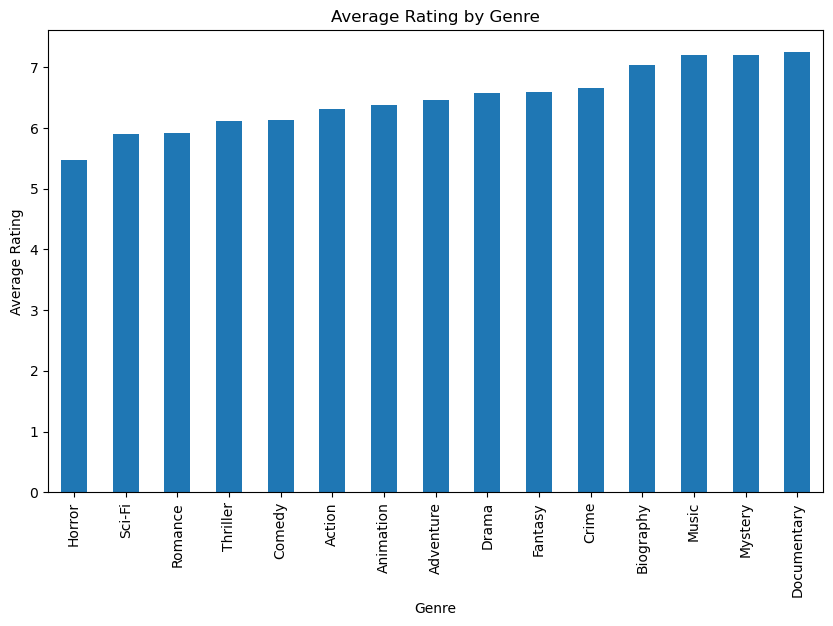

In [232]:
#group the data by the 'genres' column and calculate the average rating for each genre using groupby and mean to make the plot more readable
genre_avg_rating = Cumulative.groupby('genres')['averagerating'].mean().sort_values()

# Plot the bar chart
plt.figure(figsize=(10,6))
genre_avg_rating.plot(kind='bar')
plt.title('Average Rating by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.show()

In [233]:
Cumulative['Total gross']

0       1.067000e+09
1       8.283000e+08
2       7.526000e+08
3       6.985000e+08
4       6.239000e+08
            ...     
1842    7.200000e+04
1843    3.710000e+04
1844    2.160000e+04
1845    6.200000e+03
1846    1.700000e+03
Name: Total gross, Length: 1845, dtype: float64

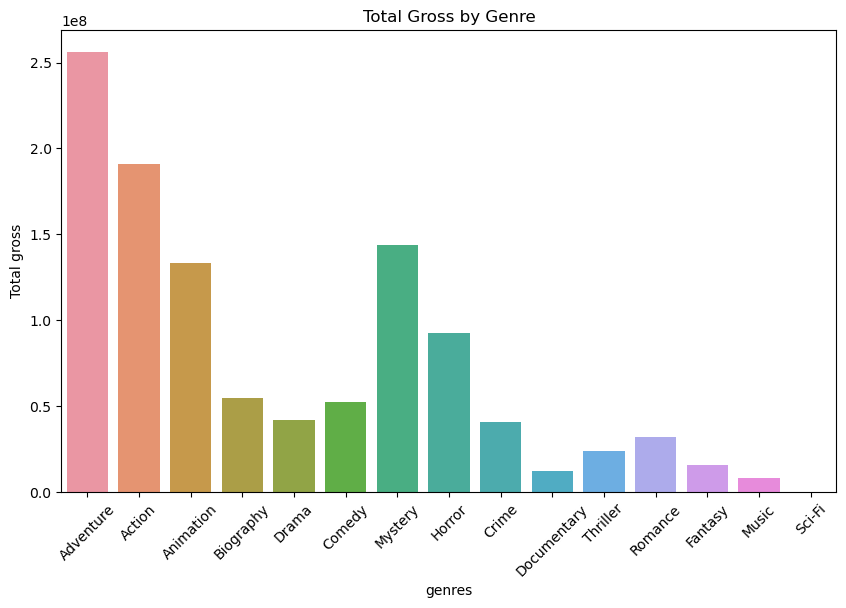

In [243]:
#group the data by the 'genres' column and calculate the total gross for each genre using groupby and sum for aesier readability.
plt.figure(figsize=(10,6))
sns.barplot(x='genres', y='Total gross', data=Cumulative, errorbar=None)
plt.title('Total Gross by Genre')
plt.xticks(rotation=45)
plt.show()

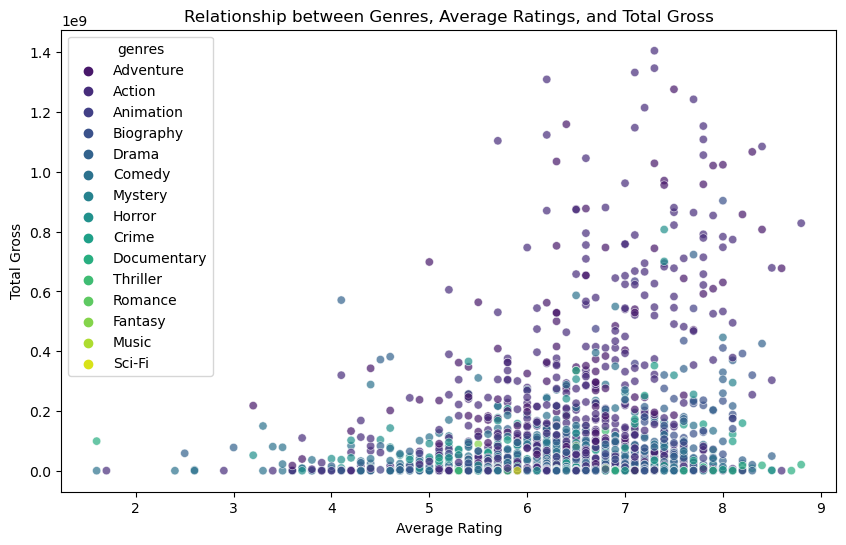

In [236]:
#To visualize the relationship between genres, average ratings, and total gross,i used a scatter plot.
#Each point on the plot represents a movie, with the x-coordinate corresponding to its average rating, 
#the y-coordinate corresponding to its total gross, and the color indicating its genre.
plt.figure(figsize=(10,6))
sns.scatterplot(x='averagerating', y='Total gross', hue='genres', data=Cumulative, alpha=0.7, palette='viridis')
plt.title('Relationship between Genres, Average Ratings, and Total Gross')
plt.xlabel('Average Rating')
plt.ylabel('Total Gross')
plt.show()

In [249]:
df2 = Cumulative.groupby(['genres'])['averagerating'].max().sort_values(ascending = False)
df2

genres
Action         8.8
Documentary    8.8
Adventure      8.6
Crime          8.5
Drama          8.5
Biography      8.3
Fantasy        8.2
Comedy         8.1
Mystery        8.1
Animation      7.8
Horror         7.7
Music          7.2
Romance        7.1
Thriller       6.8
Sci-Fi         5.9
Name: averagerating, dtype: float64

In [244]:
total_gross_weight = 0.6  
average_rating_weight = 0.4

# Calculate the profitability m
Cumulative['profitability'] = (Cumulative['Total gross'] * total_gross_weight) + (Cumulative['averagerating'] * average_rating_weight)

# Group the data by genre and calculate the mean profitability for each genre
genre_profitability = Cumulative.groupby('genres')['profitability'].mean().sort_values(ascending=False)
genre_profitability


genres
Adventure      1.536868e+08
Action         1.147279e+08
Mystery        8.613396e+07
Animation      8.001950e+07
Horror         5.547578e+07
Biography      3.268328e+07
Comedy         3.156295e+07
Drama          2.500379e+07
Crime          2.431790e+07
Romance        1.931597e+07
Thriller       1.446750e+07
Fantasy        9.466803e+06
Documentary    7.429183e+06
Music          4.800003e+06
Sci-Fi         4.680236e+04
Name: profitability, dtype: float64

In [246]:
#calculating the most profitable genre
# weight put on importance
total_gross_weight = 0.6 
average_rating_weight = 0.4

# Calculate the profitability m
Cumulative['profitability'] = (Cumulative['Total gross'] * total_gross_weight) + (Cumulative['averagerating'] * average_rating_weight)

# Group the data by genre and calculate the mean profitability for each genre
genre_profitability = Cumulative.groupby('genres')['profitability'].mean().sort_values(ascending=False)

# The genre with the highest average profitability is considered the most profitable
most_profitable_genre = genre_profitability.idxmax()
average_profitability_most_profitable_genre = genre_profitability.max()

print(f"The most profitable genre in relation to total gross and average rating is '{most_profitable_genre}' with an average profitability of {average_profitability_most_profitable_genre:.2f}.")

The most profitable genre in relation to total gross and average rating is 'Adventure' with an average profitability of 153686826.90.


Conclusion: Microsoft should consider Adventure genre in their new studio as it ratings and profit magine(total gross)
offers the highest profitability of all available genres